데이터 스켈링 및 학습/테스트셋 준비

fatal: destination path 'data' already exists and is not an empty directory.


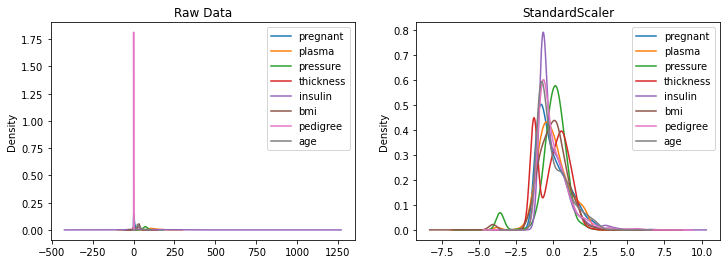

In [1]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np 

!git clone https://github.com/taehojo/data.git

df = pd.read_csv('./data/pima-indians-diabetes3.csv')

X = df.iloc[:,0:8]
y = df.iloc[:,8]

ss = StandardScaler()
scaled_X = pd.DataFrame(ss.fit_transform(X), columns=X.columns) 

fig, ax = plt.subplots(1, 2, figsize=(12,4))
X.plot(kind='kde', title='Raw Data', ax=ax[0])
scaled_X.plot(kind='kde', title='StandardScaler', ax=ax[1]) 
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

결정 트리

In [2]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10, shuffle=True) 

accuraries = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuraries.mean()*100)) 
print("Standard Deviation: {:.2f} %".format(accuraries.std()*100))

Accuracy: 65.46 %
Standard Deviation: 4.37 %


랜덤 포레스트

In [3]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=50)
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10, shuffle=True) 

accuraries = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuraries.mean()*100)) 
print("Standard Deviation: {:.2f} %".format(accuraries.std()*100))

Accuracy: 75.00 %
Standard Deviation: 5.12 %


가우시안 나이브 베이즈

In [4]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10, shuffle=True) 

accuraries = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuraries.mean()*100)) 
print("Standard Deviation: {:.2f} %".format(accuraries.std()*100))

Accuracy: 74.81 %
Standard Deviation: 5.80 %


k-최근접 이웃

In [5]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10, shuffle=True) 

accuraries = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuraries.mean()*100)) 
print("Standard Deviation: {:.2f} %".format(accuraries.std()*100))

Accuracy: 70.66 %
Standard Deviation: 3.49 %


에이다 부스트

In [6]:
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier()
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10, shuffle=True) 

accuraries = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuraries.mean()*100)) 
print("Standard Deviation: {:.2f} %".format(accuraries.std()*100))

Accuracy: 75.54 %
Standard Deviation: 2.88 %


이차 판별 분석

In [7]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifier = QuadraticDiscriminantAnalysis()
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10, shuffle=True) 

accuraries = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuraries.mean()*100)) 
print("Standard Deviation: {:.2f} %".format(accuraries.std()*100))

Accuracy: 73.42 %
Standard Deviation: 4.20 %


서포트 벡터 머신

In [8]:
from sklearn.svm import SVC

classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10, shuffle=True) 

accuraries = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuraries.mean()*100)) 
print("Standard Deviation: {:.2f} %".format(accuraries.std()*100))

Accuracy: 76.56 %
Standard Deviation: 4.47 %


서포트 벡터 머신 (RHF 커널)

In [9]:
from sklearn.svm import SVC

classifier = SVC(kernel='rbf')
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10, shuffle=True) 

accuraries = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuraries.mean()*100)) 
print("Standard Deviation: {:.2f} %".format(accuraries.std()*100))

Accuracy: 74.99 %
Standard Deviation: 3.21 %


보팅

In [10]:
from sklearn.ensemble import VotingClassifier

clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier()
clf3 = SVC(kernel='linear')
classifier = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)])
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10, shuffle=True) 

accuraries = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuraries.mean()*100)) 
print("Standard Deviation: {:.2f} %".format(accuraries.std()*100))

Accuracy: 74.97 %
Standard Deviation: 6.90 %


배깅

In [11]:
from sklearn.ensemble import BaggingClassifier

classifier = BaggingClassifier(base_estimator=SVC(kernel='rbf'), n_estimators=10)
classifier.fit(X_train, y_train) 

skf = StratifiedKFold(n_splits=10, shuffle=True) 

accuraries = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuraries.mean()*100)) 
print("Standard Deviation: {:.2f} %".format(accuraries.std()*100))

Accuracy: 74.46 %
Standard Deviation: 4.20 %


여러 알고리즘의 성능을 한눈에 비교하기

Mean accuracy of D_tree : 71.17 %
Mean accuracy of RF : 74.82 %
Mean accuracy of GNB : 75.17 %
Mean accuracy of KNN : 69.29 %
Mean accuracy of Ada : 76.22 %
Mean accuracy of QDA : 75.02 %
Mean accuracy of SVM_l : 72.06 %
Mean accuracy of SVM_k : 73.45 %
Mean accuracy of Voting : 76.22 %
Mean accuracy of Bagging : 75.52 %


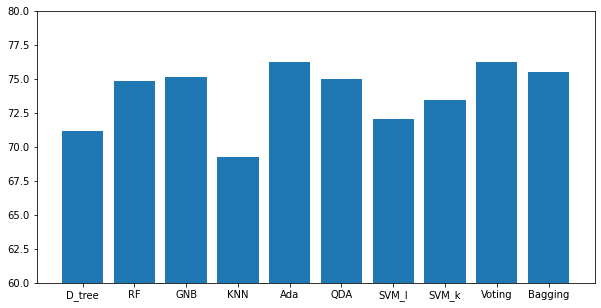

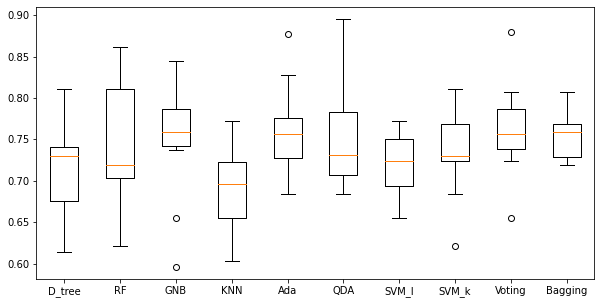

In [14]:
classifiers = [DecisionTreeClassifier(),
               RandomForestClassifier(),
               GaussianNB(),
               KNeighborsClassifier(),
               SVC(kernel = 'linear'),
               SVC(kernel = 'rbf'),
               AdaBoostClassifier(),
               QuadraticDiscriminantAnalysis(),
               VotingClassifier(estimators=[('1', AdaBoostClassifier()), 
                                            ('2', RandomForestClassifier()), 
                                            ('3', SVC(kernel = 'linear'))]),
               BaggingClassifier(base_estimator=clf3, n_estimators=10, random_state=0)
              ]

classifier_names = ['D_tree',
                    'RF', 
                    'GNB', 
                    'KNN', 
                    'Ada',
                    'QDA',
                    'SVM_l',
                    'SVM_k',
                    'Voting',
                    'Bagging'
                   ]

modelaccuracies = []
modelmeans = []
modelnames = []

classifier_data=zip(classifier_names, classifiers)
for classifier_name, classifier in classifier_data: 
    skf=StratifiedKFold(n_splits=10, shuffle=True)
    accuracies=cross_val_score(classifier, X = X_train, y = y_train, cv = skf)
    print("Mean accuracy of", classifier_name, ": {:.2f} %".format(accuracies.mean()*100))
    modelaccuracies.append(accuracies)
    modelnames.append(classifier_name)
    modelmeans.append(accuracies.mean()*100)  

plt.figure(figsize=(10,5))    
plt.ylim([60, 80])
plt.bar(modelnames, modelmeans);

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames)
plt.show()